### Task:  develop models to support marketing campaigns for high yield term certificate of deposit (CD) products. 
**Data**: simulated data for multiple sales campaigns conducted by a hypothetical banking institution ABC. The campaigns were conducted over the phone to offer high yield term CD products to existing clients. Often, more than one contact with the same customer was necessary to assess whether the client would open a CD account. Each record represents a unique customer.  

**Output**: predict client has subscribed a CD account or not (binary: yes, no)

In [ ]:
# library
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 





### Read files

In [ ]:
file_dir = "/content/"

train_csv = file_dir + "train.csv"
test_csv = file_dir + "test.csv"


In [ ]:
# read train data
df_train = pd.read_csv(train_csv, index_col=None)

# Exploratory Data Analysis

In [ ]:
print("Total number of rows in training data ", df_train.shape[0])
print("Total number of columns in training data ", df_train.shape[1])

print('df type: ', df_train.dtypes)

Total number of rows in training data  30000
Total number of columns in training data  17
df type:  age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays        float64
previous       int64
poutcome      object
y             object
dtype: object


In [ ]:
df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31.0,blue-collar,single,secondary,no,-806,yes,yes,cellular,24,jul,205,3,NaN,0,unknown,no
1,58.0,technician,single,secondary,no,8600,yes,no,cellular,18,nov,61,1,NaN,0,unknown,no
2,50.0,admin.,married,secondary,no,512,yes,yes,cellular,17,apr,77,3,338.0,3,failure,no
3,59.0,retired,married,secondary,no,184,no,no,cellular,8,jul,163,1,NaN,0,unknown,no
4,46.0,management,married,unknown,no,876,yes,no,cellular,31,jul,11,3,NaN,0,unknown,no


In [ ]:
df_train.describe()


,age,balance,day,duration,campaign,pdays,previous
count,28068.000000,30000.000000,30000.000000,30000.000000,30000.000000,4764.000000,30000.000000
mean,40.648318,1353.218433,15.902567,255.372800,2.837367,230.701931,0.497933
std,10.135171,2942.336628,8.297476,258.174266,3.228322,108.245232,1.800510
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,150.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,225.000000,0.000000
75%,48.000000,1412.000000,21.000000,316.000000,3.000000,332.000000,0.000000
max,89.000000,98417.000000,31.000000,3881.000000,63.000000,792.000000,55.000000


In [ ]:
# Get list of categorical variables
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)


Categorical variables:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


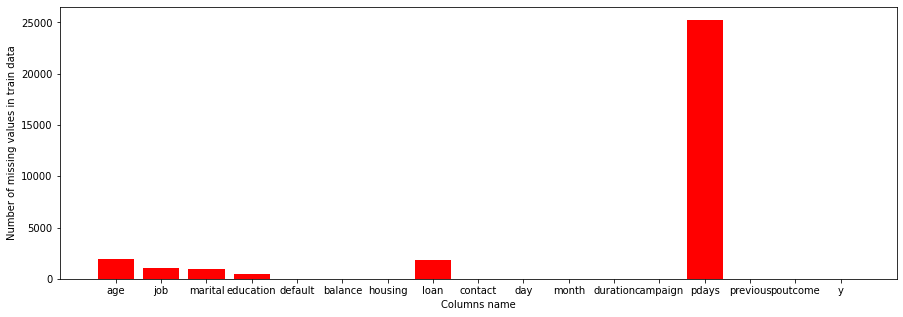

Index(['pdays'], dtype='object')

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(df_train.columns, df_train.isnull().sum().values, color='red')
plt.xlabel("Columns name")
plt.ylabel("Number of missing values in train data")
plt.show()

null_sum = df_train.isnull().sum()
df_train.columns[null_sum > len(df_train) * 0.1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


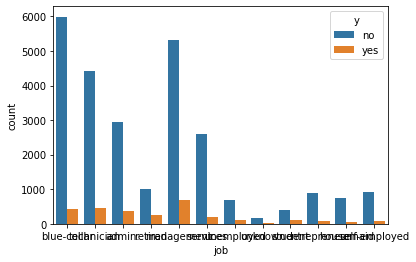

In [ ]:
sns.countplot('job', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


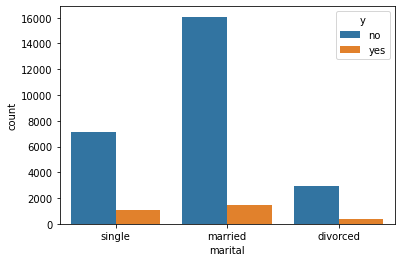

In [ ]:
sns.countplot('marital', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


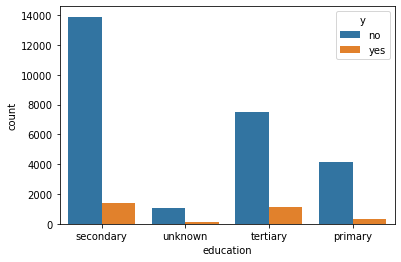

In [ ]:
sns.countplot('education', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


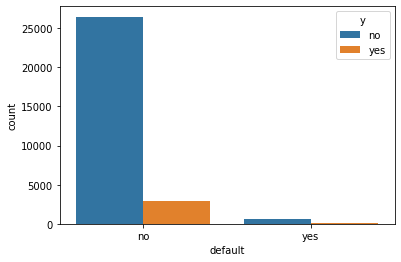

In [ ]:
sns.countplot('default', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


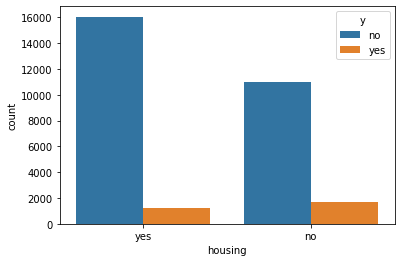

In [ ]:
sns.countplot('housing', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


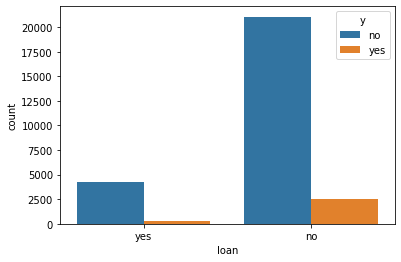

In [ ]:
sns.countplot('loan', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


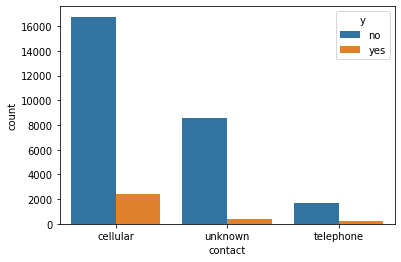

In [ ]:
sns.countplot('contact', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


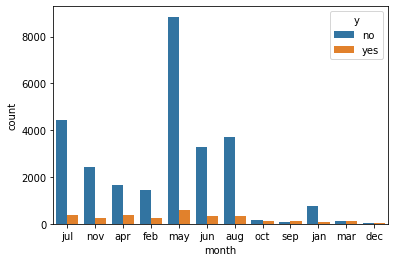

In [ ]:
sns.countplot('month', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


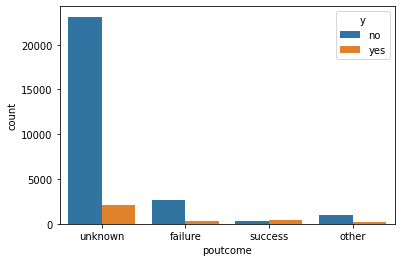

In [ ]:
sns.countplot('poutcome', hue='y', data=df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


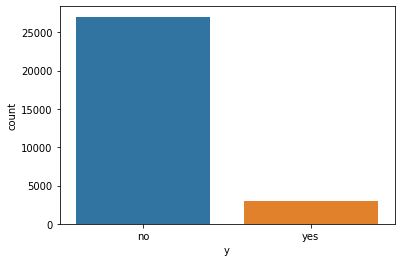

In [ ]:
sns.countplot('y', data=df_train)


### missing value and categorical value processing

In [ ]:
def fill_missing_value(df_X):

  cols_with_missing = [col for col in df_X.columns
                      if df_X[col].isnull().any()]
  print("cols_with_missing: ", cols_with_missing)

  # Imputation
  imputed_df_X = df_X.fillna(df_X[cols_with_missing].agg(lambda x: pd.Series.mode(x)[0], axis=0))
  return imputed_df_X
#imputed_df_X.head(5)

In [ ]:
# one hot encoding

def categorical_process_one_hot(imputed_df_X):
  # Apply one-hot encoder to each column with categorical data
  # Get list of categorical variables
  s = (imputed_df_X.dtypes == 'object')
  object_cols = list(s[s].index)
  print('Categorical variables:: ', object_cols)

  OH_encoder = OneHotEncoder(handle_unknown='error', sparse=False)
  OH_cols = pd.DataFrame(OH_encoder.fit_transform(imputed_df_X[object_cols]))

  # One-hot encoding removed index; put it back
  OH_cols.index = imputed_df_X.index

  # Remove categorical columns (will replace with one-hot encoding)
  num_X = imputed_df_X.drop(object_cols, axis=1)

  # Add one-hot encoded columns to numerical features
  OH_X = pd.concat([num_X, OH_cols], axis=1)
  return OH_X

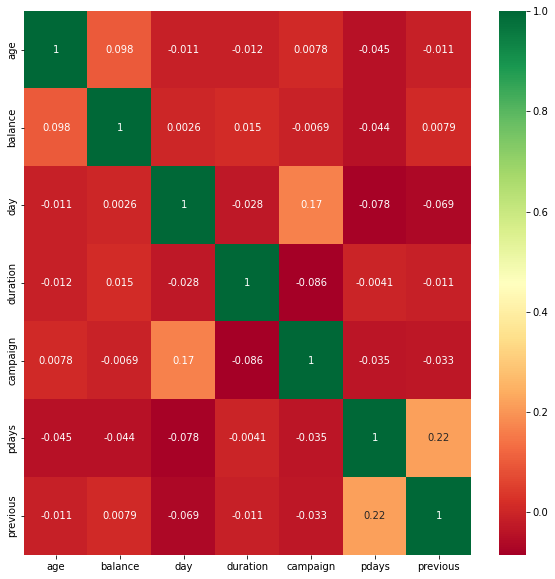

In [ ]:
# Simple correlation Analysis¶
_, ax = plt.subplots(figsize=(10,10))
columns =  imputed_df_train_X.columns
sns.heatmap(imputed_df_train_X[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);


# Train the model with logistical regression and random forest


# Data is imbalanced; use balanced weight to measure the classification
 f1 socre

In [ ]:
df_train_X = df_train.loc[:, df_train.columns != 'y']
df_train_Y = df_train['y']

imputed_df_train_X = fill_missing_value(df_train_X)
OH_X_train = categorical_process_one_hot(imputed_df_train_X)
X_train = OH_X_train
le = LabelEncoder()
y_train = le.fit_transform(df_train_Y)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

#over_sampler = SMOTE(k_neighbors=3)
#X_train, y_train = over_sampler.fit_resample(X_train, y_train)

rus = RandomUnderSampler(return_indices=True)
X_train, y_train, id_rus = rus.fit_sample(X_train, y_train)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

cols_with_missing:  ['age', 'job', 'marital', 'education', 'loan', 'pdays']
Categorical variables::  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
X_train:  (30000, 51)
y_train:  (30000,)
X_train:  (5914, 51)
y_train:  (5914,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# feature selection
#sel_chi2 = SelectKBest(chi2, k=4)    # select 4 features
#X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
#print(sel_chi2.get_support())


In [ ]:
# logistic regression

# scale data
scaler = StandardScaler()     # MinMaxScaler, StandardScaler
X_scaled_train = scaler.fit_transform(X_train)

param_grid = {
              'penalty': ['l1', 'l2', 'elasticnet']
							}

clf_lr = LogisticRegression(class_weight =None)     # 'balanced' unblanced data
grid_clf_lr = GridSearchCV(clf_lr, param_grid, cv=10, scoring='f1')
grid_clf_lr.fit(X_scaled_train, y_train)
#print(grid_clf. best_params_, grid_clf.cv_results_)

print(grid_clf_lr.best_params_) 
y_train_predicted = grid_clf_lr.predict(X_train) 
   
# print classification report 
print(classification_report(y_train, y_train_predicted)) 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


{'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      2957
           1       0.50      1.00      0.67      2957

    accuracy                           0.50      5914
   macro avg       0.75      0.50      0.34      5914
weighted avg       0.75      0.50      0.34      5914



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


In [ ]:
# random forest classfication 
# use-- cross valiation
# no need to scale the data
param_grid = {
              'n_estimators': [10, 15, 20],
              'max_depth': [2, 5, 7]
             }

clf = RandomForestClassifier()
grid_clf_rf = GridSearchCV(clf, param_grid, cv=10, scoring='f1')
grid_clf_rf.fit(X_train, y_train)
#print(grid_clf. best_params_, grid_clf.cv_results_)

print(grid_clf_rf.best_params_) 
y_train_predicted = grid_clf_rf.predict(X_train) 
   
# print classification report 
print(classification_report(y_train, y_train_predicted)) 


{'max_depth': 7, 'n_estimators': 20}
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2957
           1       0.87      0.90      0.88      2957

    accuracy                           0.88      5914
   macro avg       0.88      0.88      0.88      5914
weighted avg       0.88      0.88      0.88      5914



### Read test data

In [ ]:
#test_csv = file_dir + "test.csv"
df_test = pd.read_csv(test_csv)
print(df_test.head(5))
print(df_test.shape)

    age         job  marital  education  ...  pdays  previous poutcome    y
0  41.0  management  married   tertiary  ...    NaN         0  unknown   no
1  47.0  management   single   tertiary  ...   87.0         1  success  yes
2  52.0      admin.  married  secondary  ...    NaN         0  unknown   no
3  40.0    services   single  secondary  ...    NaN         0  unknown   no
4   NaN    services  married  secondary  ...  404.0         2  success   no

[5 rows x 17 columns]
(5000, 17)


In [ ]:
df_test_X = df_test.loc[:, df_test.columns != 'y']
df_test_Y = df_test['y']

imputed_df_test_X = fill_missing_value(df_test_X)
X_test = categorical_process_one_hot(imputed_df_test_X)
le = LabelEncoder()
y_test = le.fit_transform(df_test_Y)

print(" X_test, y_test shape: ", X_test.shape, y_test.shape)

# predict with logistics regression
y_test_predicted = grid_clf_lr.predict(X_test) 
#print('y_test_predicted: ', y_test_predicted.shape)
# print classification report 
print('Logistics regression test result:', classification_report(y_test, y_test_predicted)) 


# predict with random forest
y_test_predicted = grid_clf_rf.predict(X_test) 
#rint('y_test_predicted: ', y_test_predicted.shape)
# print classification report 
print('Random forest result:', classification_report(y_test, y_test_predicted)) 


cols_with_missing:  ['age', 'job', 'marital', 'education', 'loan', 'pdays']
Categorical variables::  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
 X_test, y_test shape:  (5000, 51) (5000,)
Logistics regression test result:               precision    recall  f1-score   support

           0       1.00      0.00      0.01      4501
           1       0.10      1.00      0.18       499

    accuracy                           0.10      5000
   macro avg       0.55      0.50      0.10      5000
weighted avg       0.91      0.10      0.03      5000

Random forest result:               precision    recall  f1-score   support

           0       0.98      0.82      0.89      4501
           1       0.35      0.88      0.50       499

    accuracy                           0.83      5000
   macro avg       0.67      0.85      0.70      5000
weighted avg       0.92      0.83      0.86      5000



No Info: ROC AUC=0.500
Logistic: ROC AUC=0.509


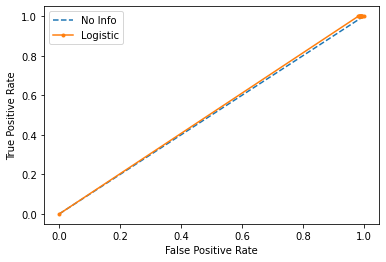

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# plot ROC
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_clf_lr.predict_proba(X_test)

lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Info: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Info')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()